In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('mnist.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

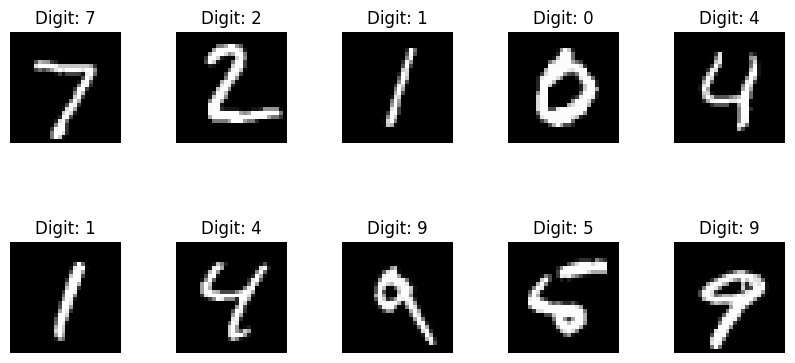

In [4]:
fig, axes = plt.subplots(2, 5 , figsize= (10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_test[i], cmap ='gray')
    axes[i].set_title(f"Digit: {y_test[i]}" )
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

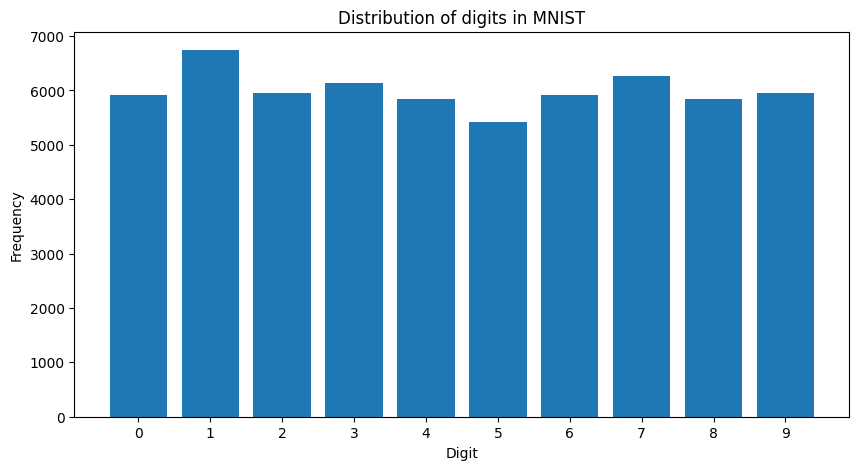

In [5]:
# Print the unique classes and their counts
unique, counts = np.unique(y_train, return_counts=True)
# Plot the distribution of classes
plt.figure(figsize=(10, 5))
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Distribution of digits in MNIST")
plt.show()

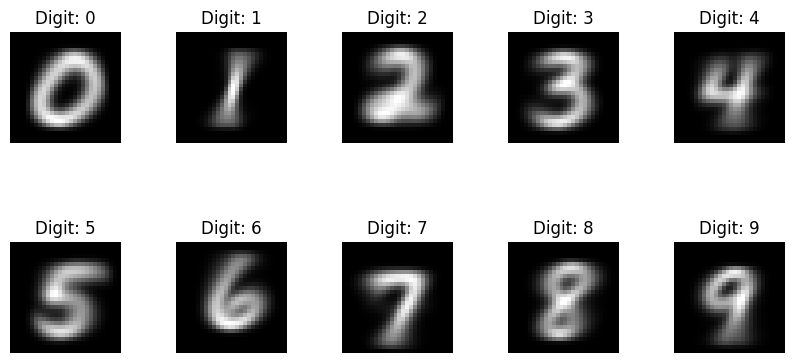

In [6]:
avg_images = np.array([np.mean(x_train[y_train == i], axis=0) for i in range(10)])

# Plot average images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(avg_images[i], cmap='gray')
    axes[i].set_title("Digit: %s" % i)
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

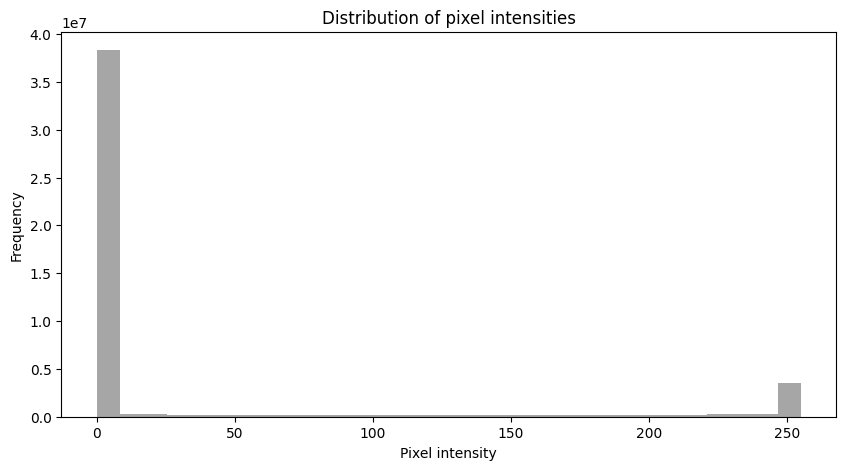

In [13]:
# Reshape X to 2D
X_2D = x_train.reshape(x_train.shape[0], -1)
# print(X_2D.shape)
# print(x_train.shape)
# Histogram of pixel intensities
plt.figure(figsize=(10, 5))
plt.hist(X_2D.ravel(), bins=30, color='gray', alpha=0.7)
plt.title("Distribution of pixel intensities")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")
plt.show()

C:\Users\vodat\AppData\Local\Temp\ipykernel_3596\3590539043.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('nipy_spectral', 10))


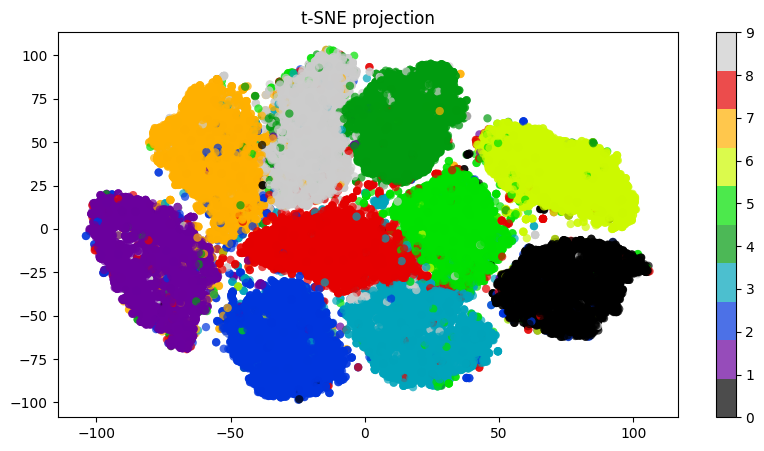

In [14]:
from sklearn.manifold import TSNE
# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_2D)
plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title("t-SNE projection")

# Show the plots
plt.show()